In [24]:
import numpy as np
import scipy.stats
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.25)

In [30]:
# results_dir = '/home/prash/results/madrid/v20211018/HUF/split-by=patient_id/collapsed_features_dynamic_input_output'
# alarms_df = pd.read_pickle(os.path.join(results_dir, "alarm_stats_7D.csv"))
# alarms_4d_df = pd.read_pickle(os.path.join(results_dir, "alarm_stats_4D.csv"))


results_dir = '/home/prash/results/madrid/v20211018/HUF/split-by=patient_id/collapsed_features_dynamic_input_output/'
alarms_df = pd.read_pickle(os.path.join(results_dir, "alarm_stats_7D.csv"))

# plot weekly alarms distribution

In [29]:
curr_alarms_test_arr

array([38., 62., 76., 86., 96., 65., 37., 74., 63., 68., 49., 47., 57.,
       76., 59., 68., 40., 49., 76., 55., 45., 47., 74., 66., 50., 57.,
       45., 30., 69., 61., 34., 52., 45., 45., 71., 54., 55., 71., 48.,
       60., 39., 49., 67., 27., 15.])

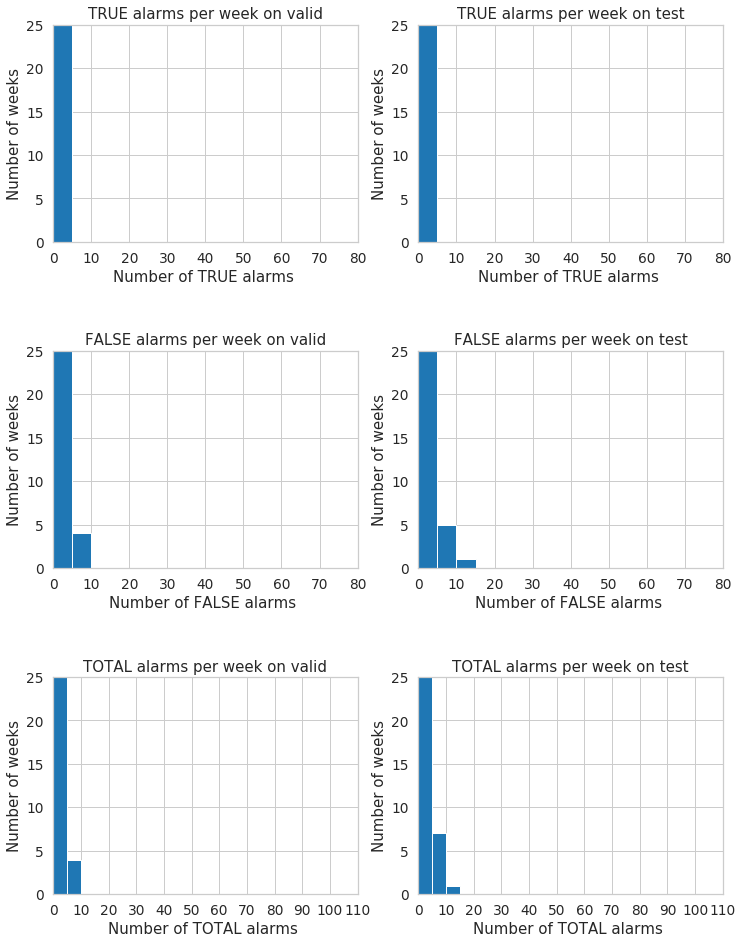

In [31]:
valid_ind = alarms_df['split']=='valid'
valid_alarms_df = alarms_df.loc[valid_ind].copy()
valid_thr_vals = valid_alarms_df['threshold_grid'].values[0]
# valid_thr_ind = np.flatnonzero(valid_thr_vals>=0.88)[0]
valid_thr_ind = np.flatnonzero(valid_thr_vals>=0.68)[0]


test_ind = alarms_df['split']=='test'
test_alarms_df = alarms_df.loc[test_ind].copy()

f, axs = plt.subplots(3, 2, figsize=(12, 16))
alarm_types_dict = {'TP_arr':'TRUE alarms per week',
                   'FP_arr' : 'FALSE alarms per week',
                   'Total_arr' : 'TOTAL alarms per week'}

bin_width = 5
bins_arr=np.arange(0, 115, bin_width)
for kk, alarm in enumerate(alarm_types_dict.keys()):
    if alarm == 'Total_arr':
        curr_alarms_valid_arr = valid_alarms_df['TP_arr'].values[0][:, valid_thr_ind]+valid_alarms_df['FP_arr'].values[0][:, valid_thr_ind]
        curr_alarms_test_arr = test_alarms_df['TP_arr'].values[0][:, valid_thr_ind]+test_alarms_df['FP_arr'].values[0][:, valid_thr_ind]
        xlim = [0, 110]                                                                                                         
    else:
        curr_alarms_valid_arr = valid_alarms_df[alarm].values[0][:, valid_thr_ind]
        curr_alarms_test_arr = test_alarms_df[alarm].values[0][:, valid_thr_ind]
        xlim = [0, 80]
        
    axs[kk, 0].hist(curr_alarms_valid_arr, bins=bins_arr)
    axs[kk, 1].hist(curr_alarms_test_arr, bins=bins_arr)
    axs[kk, 0].set_title(alarm_types_dict[alarm]+' on valid')
    axs[kk, 1].set_title(alarm_types_dict[alarm]+' on test')
    for ii in range(2):
        axs[kk, ii].set_ylabel('Number of weeks')
        axs[kk, ii].set_xticks(bins_arr[::2])
        axs[kk, ii].set_xlim(xlim)
        axs[kk, ii].set_xlabel('Number of %s'%alarm_types_dict[alarm].replace('per week', ''))
        axs[kk, ii].set_ylim([0, 25])
plt.subplots_adjust(hspace=0.5)
# f.savefig('weekly_alarms_distribution.png')
# f.savefig('weekly_alarms_distribution.pdf', bbox_inches='tight', pad_inches=0)
plt.show()

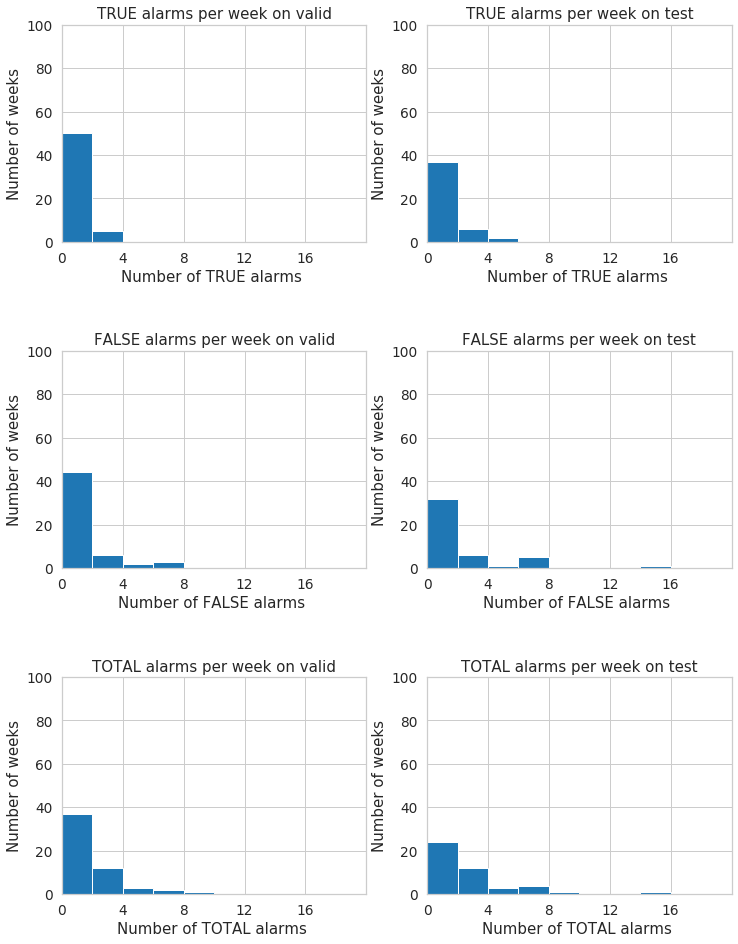

In [37]:
valid_ind = alarms_df['split']=='valid'
valid_alarms_df = alarms_df.loc[valid_ind].copy()
valid_thr_vals = valid_alarms_df['threshold_grid'].values[0]
# valid_thr_ind = np.flatnonzero(valid_thr_vals>=0.88)[0]
valid_thr_ind = np.flatnonzero(valid_thr_vals>=0.68)[0]


test_ind = alarms_df['split']=='test'
test_alarms_df = alarms_df.loc[test_ind].copy()

f, axs = plt.subplots(3, 2, figsize=(12, 16))
alarm_types_dict = {'TP_arr':'TRUE alarms per week',
                   'FP_arr' : 'FALSE alarms per week',
                   'Total_arr' : 'TOTAL alarms per week'}

bin_width = 2
bins_arr=np.arange(0, 20, bin_width)
for kk, alarm in enumerate(alarm_types_dict.keys()):
    if alarm == 'Total_arr':
        curr_alarms_valid_arr = valid_alarms_df['TP_arr'].values[0][:, valid_thr_ind]+valid_alarms_df['FP_arr'].values[0][:, valid_thr_ind]
        curr_alarms_test_arr = test_alarms_df['TP_arr'].values[0][:, valid_thr_ind]+test_alarms_df['FP_arr'].values[0][:, valid_thr_ind]
        xlim = [0, 20]                                                                                                         
    else:
        curr_alarms_valid_arr = valid_alarms_df[alarm].values[0][:, valid_thr_ind]
        curr_alarms_test_arr = test_alarms_df[alarm].values[0][:, valid_thr_ind]
        xlim = [0, 20]
        
    axs[kk, 0].hist(curr_alarms_valid_arr, bins=bins_arr)
    axs[kk, 1].hist(curr_alarms_test_arr, bins=bins_arr)
    axs[kk, 0].set_title(alarm_types_dict[alarm]+' on valid')
    axs[kk, 1].set_title(alarm_types_dict[alarm]+' on test')
    for ii in range(2):
        axs[kk, ii].set_ylabel('Number of weeks')
        axs[kk, ii].set_xticks(bins_arr[::2])
        axs[kk, ii].set_xlim(xlim)
        axs[kk, ii].set_xlabel('Number of %s'%alarm_types_dict[alarm].replace('per week', ''))
        axs[kk, ii].set_ylim([0, 100])
plt.subplots_adjust(hspace=0.5)

# plot 4day frequency alarms distribution

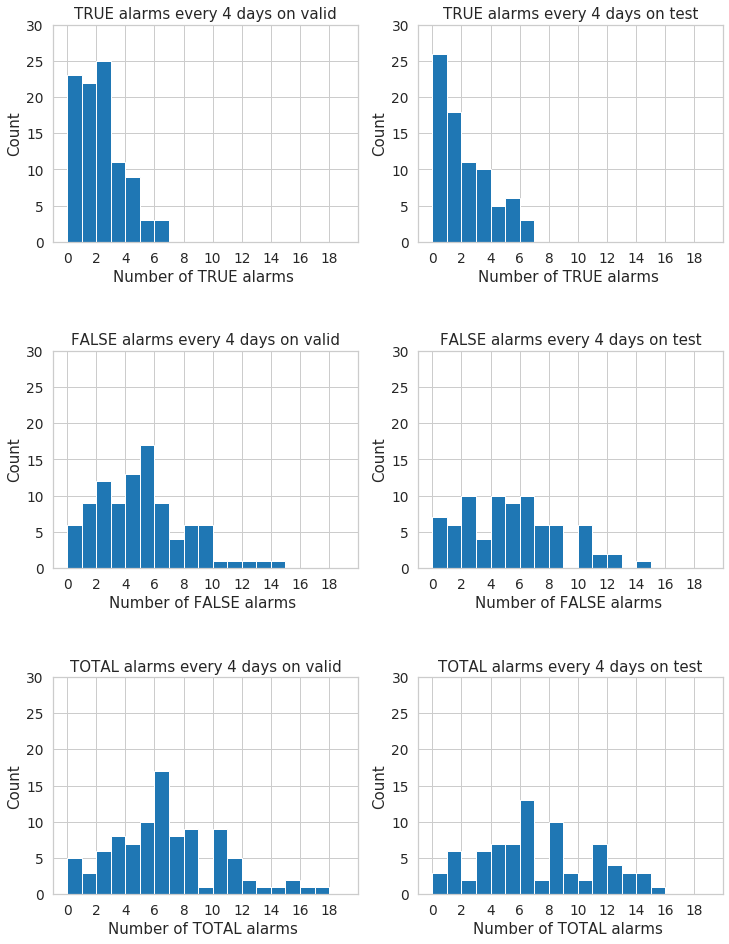

In [80]:
valid_ind = alarms_4d_df['split']=='valid'
valid_alarms_df = alarms_4d_df.loc[valid_ind].copy()
valid_thr_vals = valid_alarms_df['threshold_grid'].values[0]
valid_thr_ind = np.flatnonzero(valid_thr_vals>=0.88)[0]


test_ind = alarms_4d_df['split']=='test'
test_alarms_df = alarms_4d_df.loc[test_ind].copy()

f, axs = plt.subplots(3, 2, figsize=(12, 16))
alarm_types_dict = {'TP_arr':'TRUE alarms every 4 days',
                   'FP_arr' : 'FALSE alarms every 4 days',
                   'Total_arr' : 'TOTAL alarms every 4 days'}

bin_width = 1
bins_arr=np.arange(0, 20, bin_width)
for kk, alarm in enumerate(alarm_types_dict.keys()):
    if alarm == 'Total_arr':
        curr_alarms_valid_arr = valid_alarms_df['TP_arr'].values[0][:, valid_thr_ind]+valid_alarms_df['FP_arr'].values[0][:, valid_thr_ind]
        curr_alarms_test_arr = test_alarms_df['TP_arr'].values[0][:, valid_thr_ind]+test_alarms_df['FP_arr'].values[0][:, valid_thr_ind]
    else:
        curr_alarms_valid_arr = valid_alarms_df[alarm].values[0][:, valid_thr_ind]
        curr_alarms_test_arr = test_alarms_df[alarm].values[0][:, valid_thr_ind]
    n, bins, _= axs[kk, 0].hist(curr_alarms_valid_arr, bins=bins_arr)
    axs[kk, 1].hist(curr_alarms_test_arr, bins=bins_arr)
    axs[kk, 0].set_title(alarm_types_dict[alarm]+' on valid')
    axs[kk, 1].set_title(alarm_types_dict[alarm]+' on test')
    for ii in range(2):
        axs[kk, ii].set_ylabel('Count')
        axs[kk, ii].set_xticks(bins_arr[::2])
        axs[kk, ii].set_xlabel('Number of %s'%alarm_types_dict[alarm].replace('every 4 days', ''))
        axs[kk, ii].set_ylim([0, 30])
plt.subplots_adjust(hspace=0.5)
f.savefig('4day_alarms_distribution.png')
plt.show()

In [82]:
96*4

384